In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
from qiskit_machine_learning.utils.loss_functions import CrossEntropyLoss

plt.rcParams.update({'font.size': 24,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'axes.titlesize': 20,
                     'axes.labelsize': 24,
                     'mathtext.fontset': 'stix',
                     'font.family': 'STIXGeneral'})

In [8]:
d=8
features=2
prefix = f'features={features}/d={d}/'

sep = 'separable'

In [26]:
def plot_acc(file):
    history = pickle.load(open(file,'rb'))
    plt.plot(history['accuracy'],label='Accuracy')

In [27]:
def plot_loss(file):
    history = pickle.load(open(file,'rb'))
    plt.plot(history['loss'],label='Loss')

/usr/local/Caskroom/miniforge/base/envs/quantum_source/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


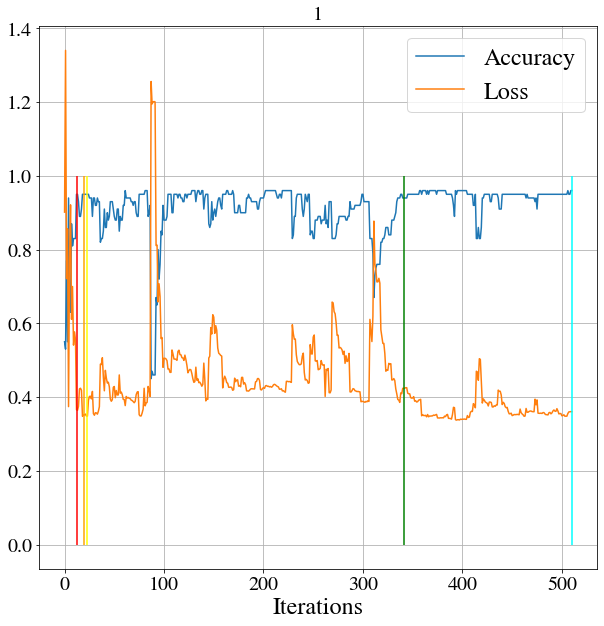

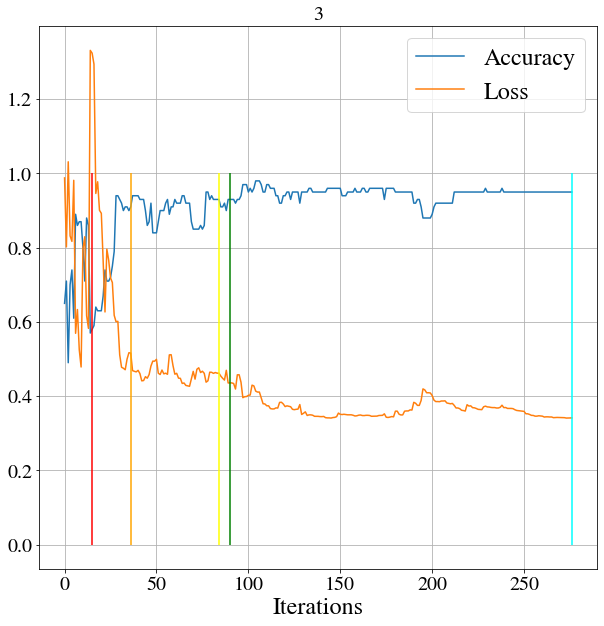

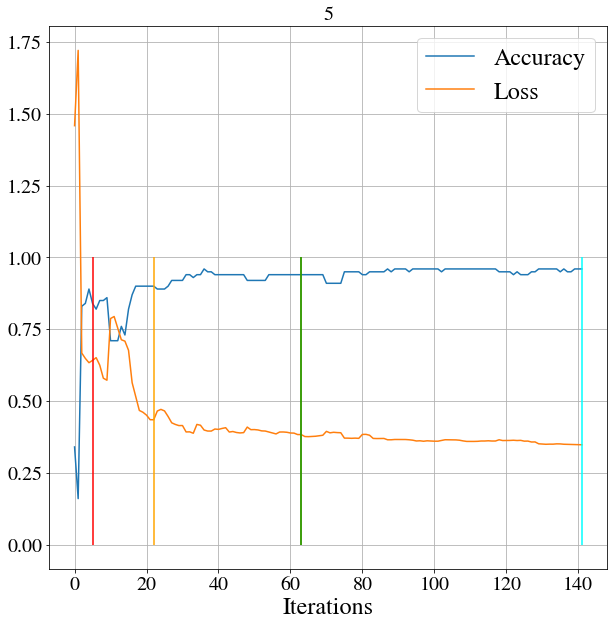

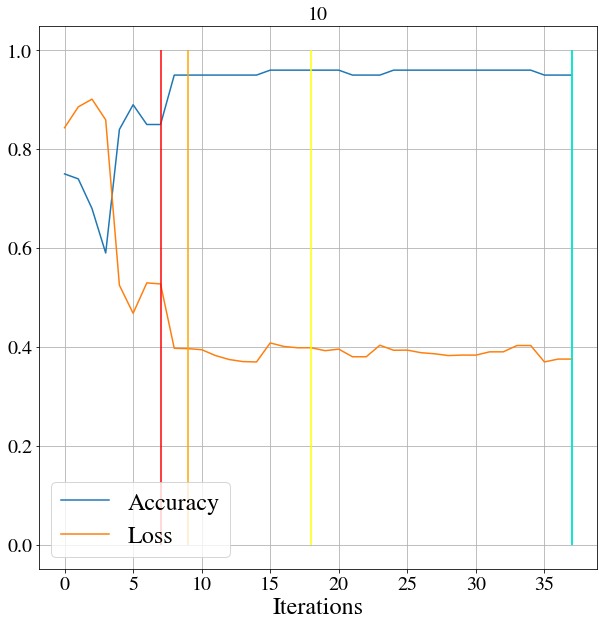

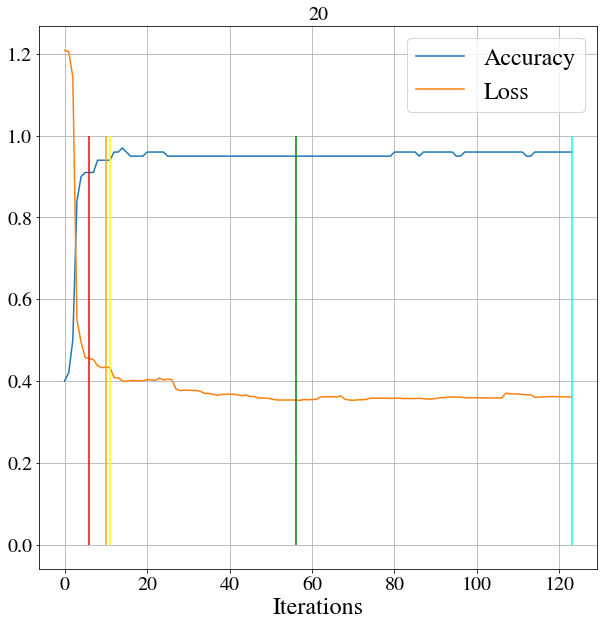

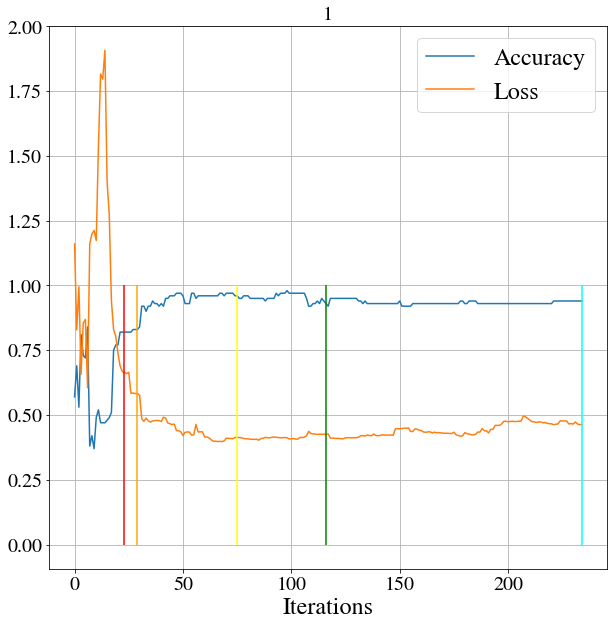

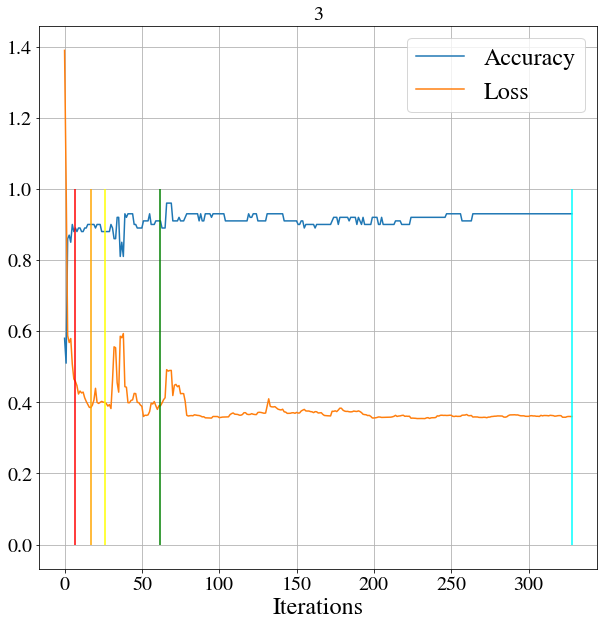

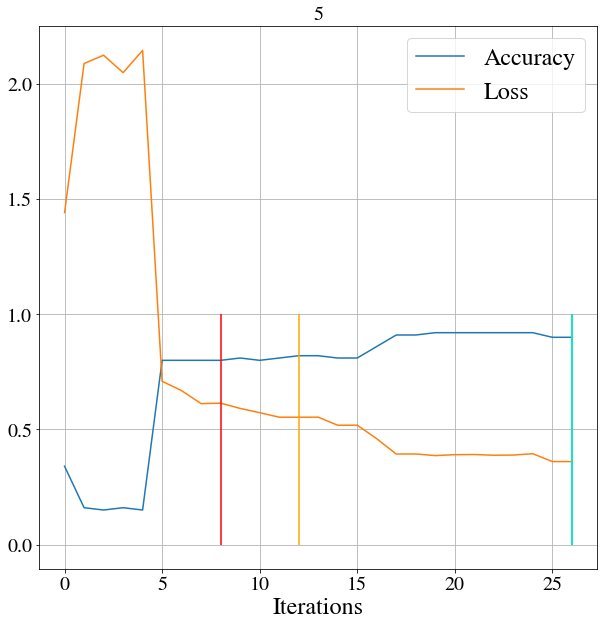

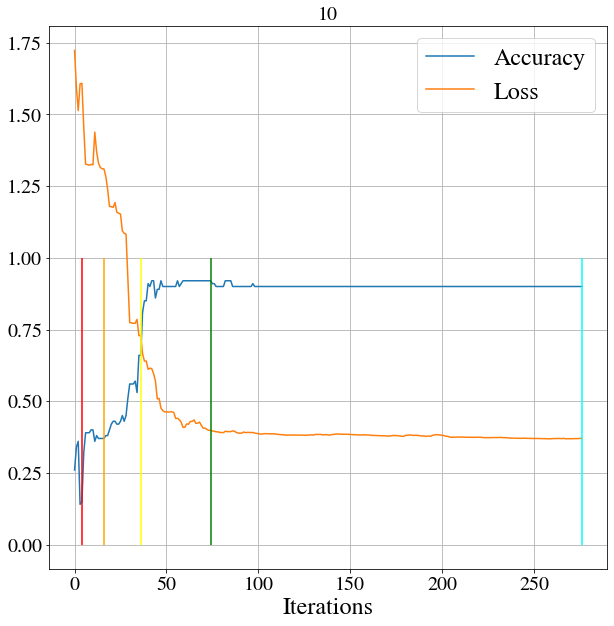

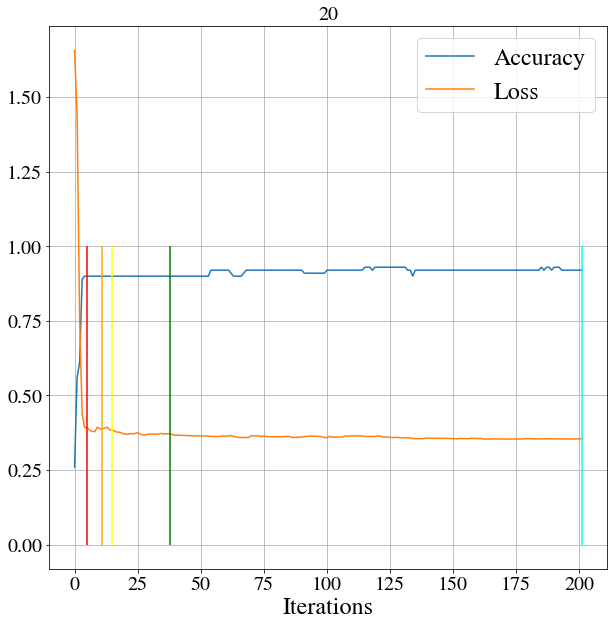

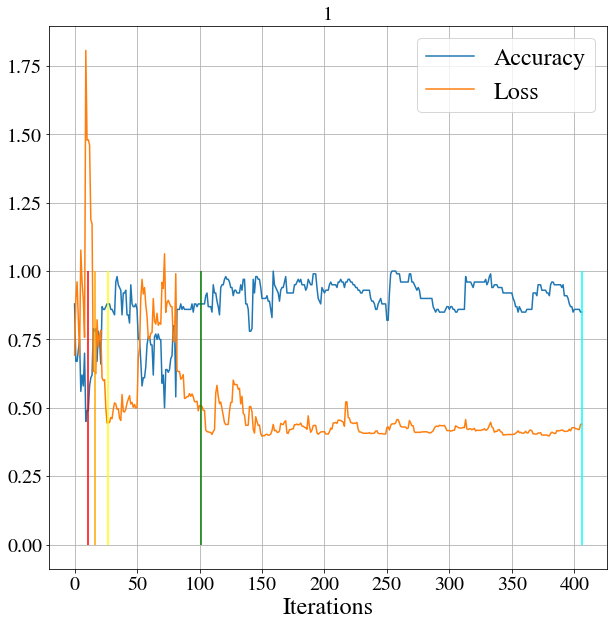

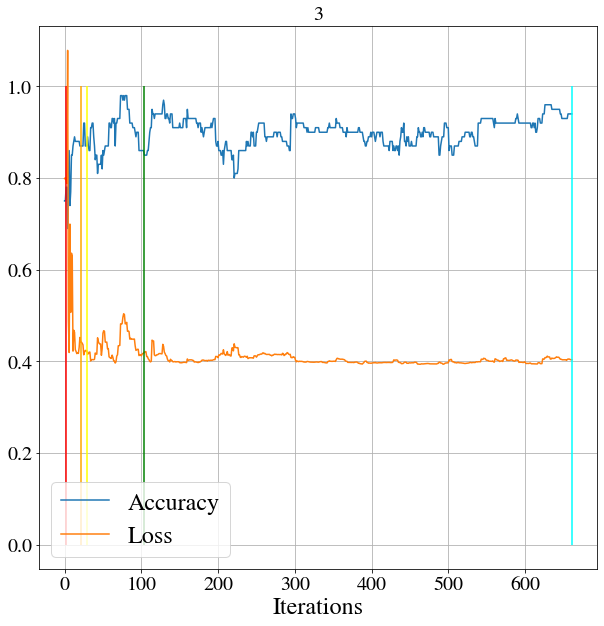

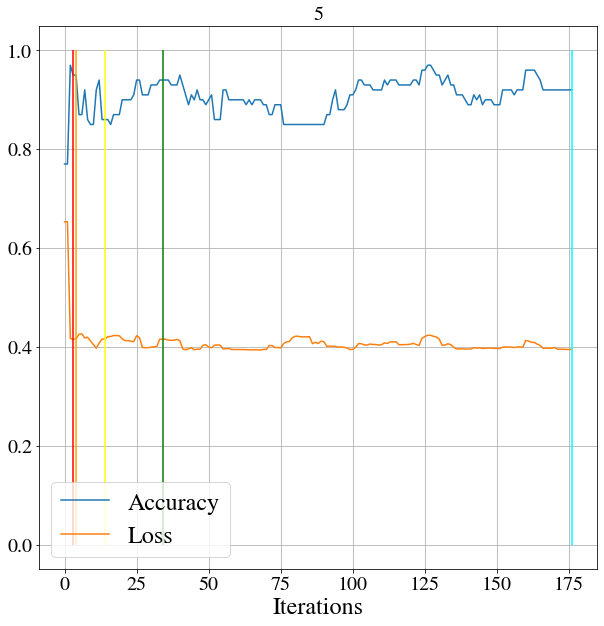

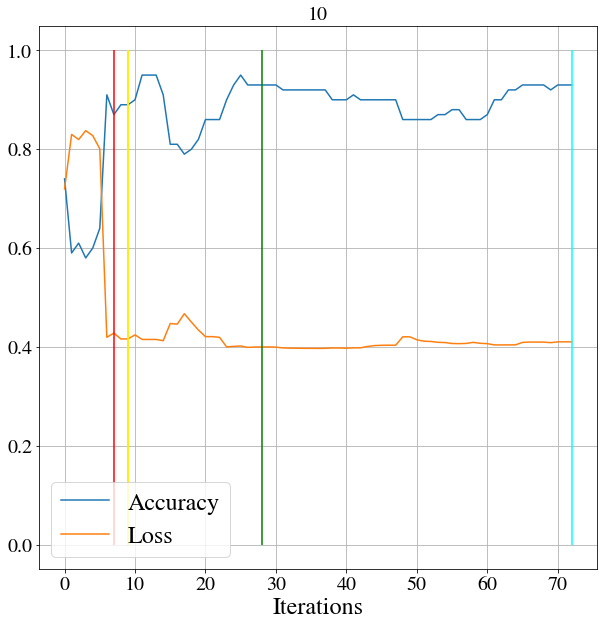

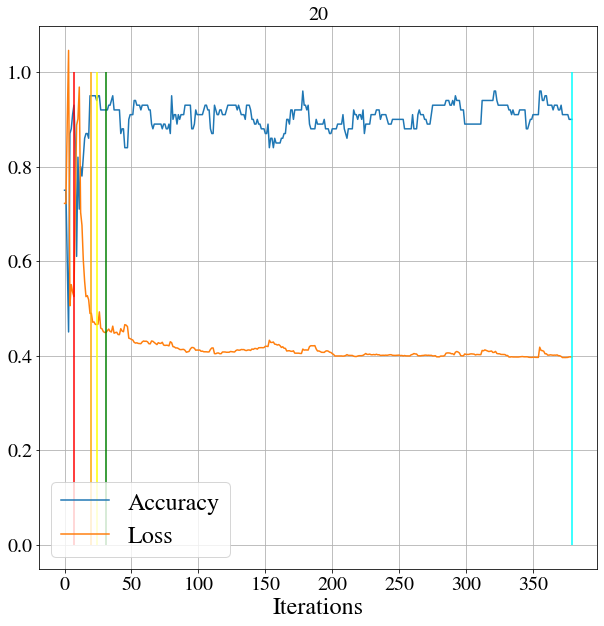

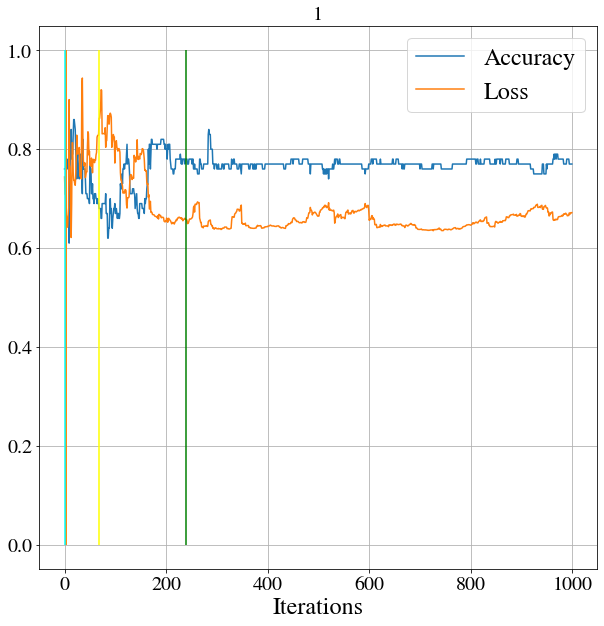

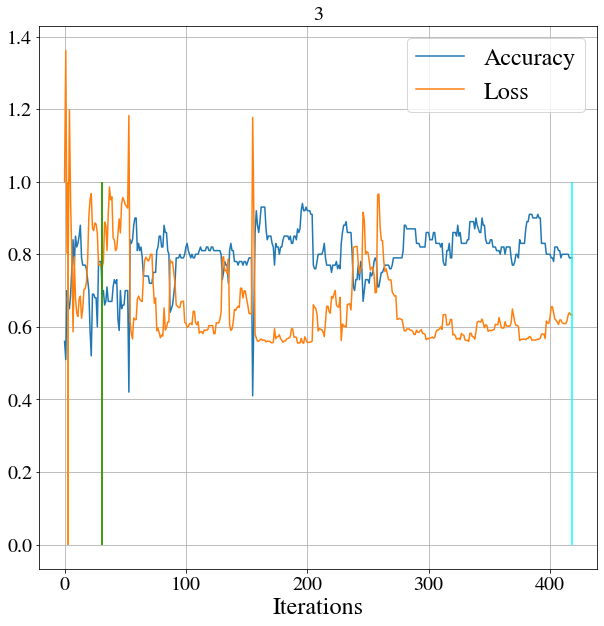

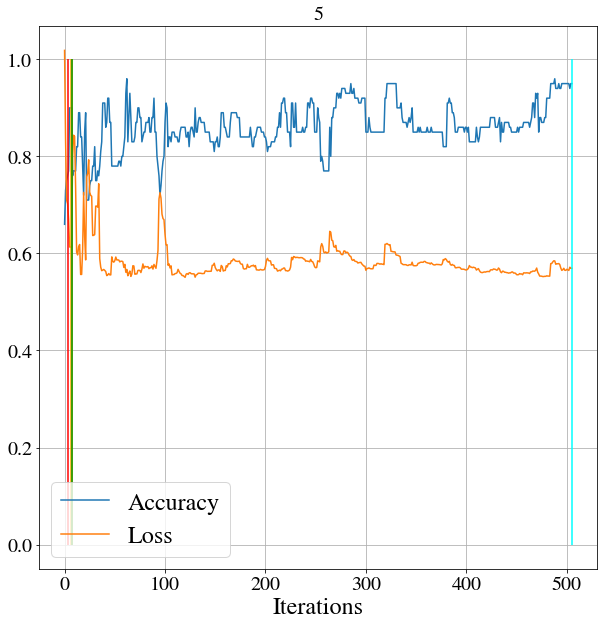

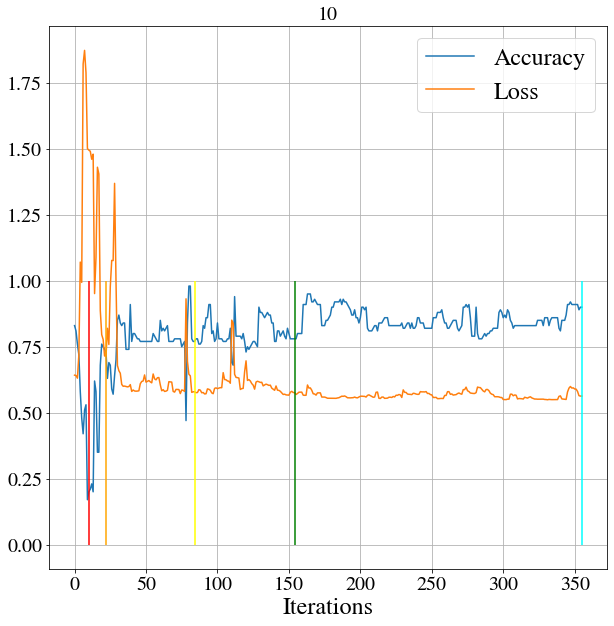

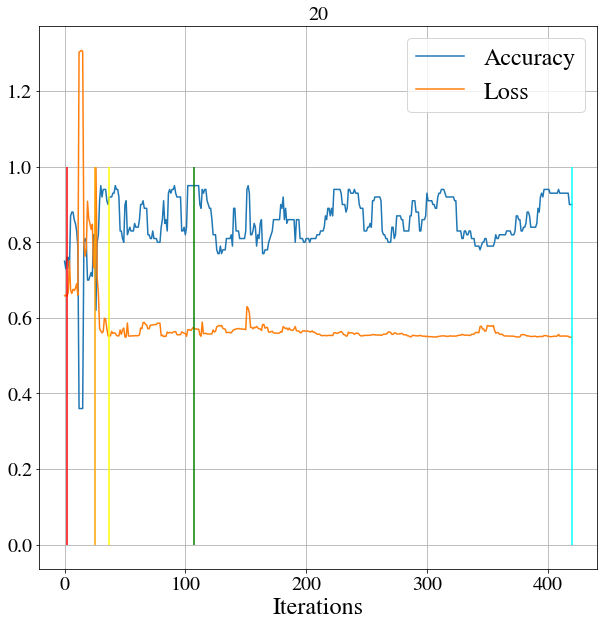

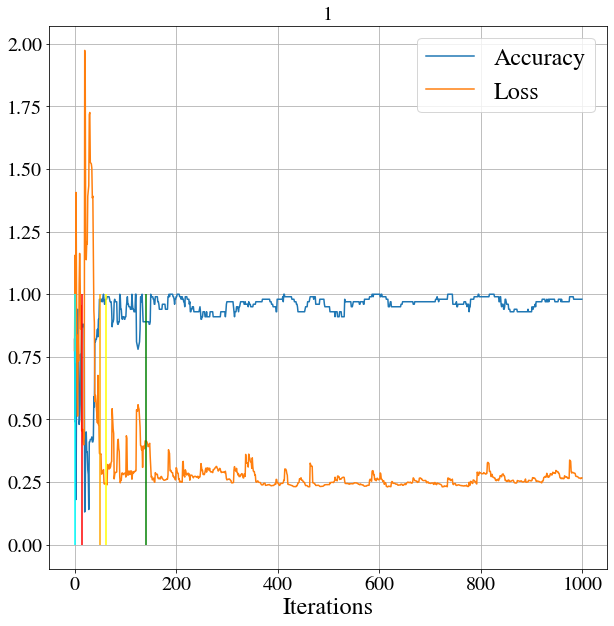

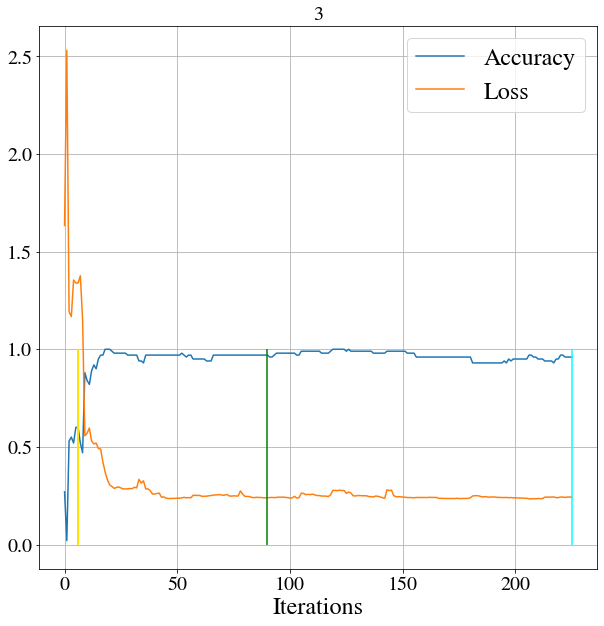

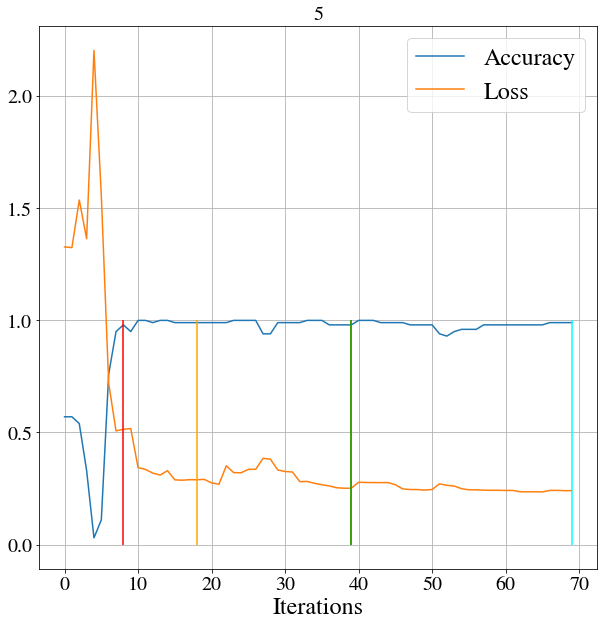

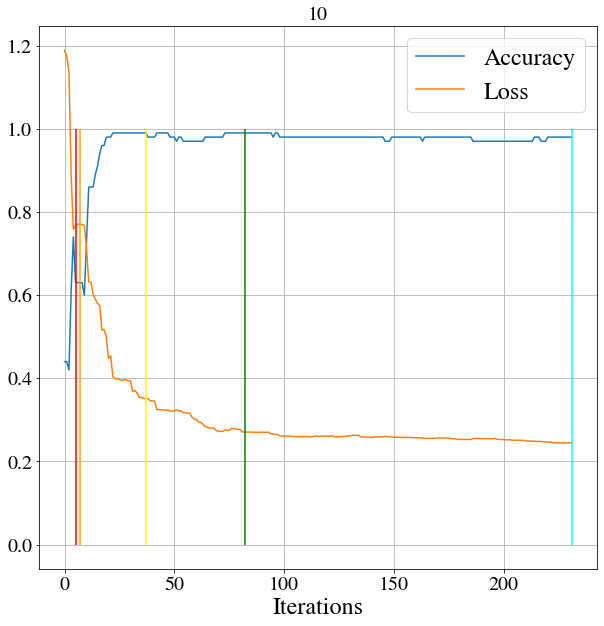

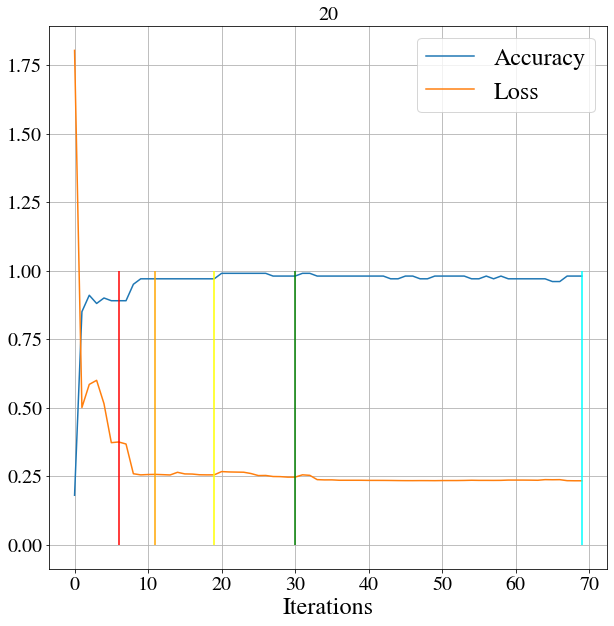

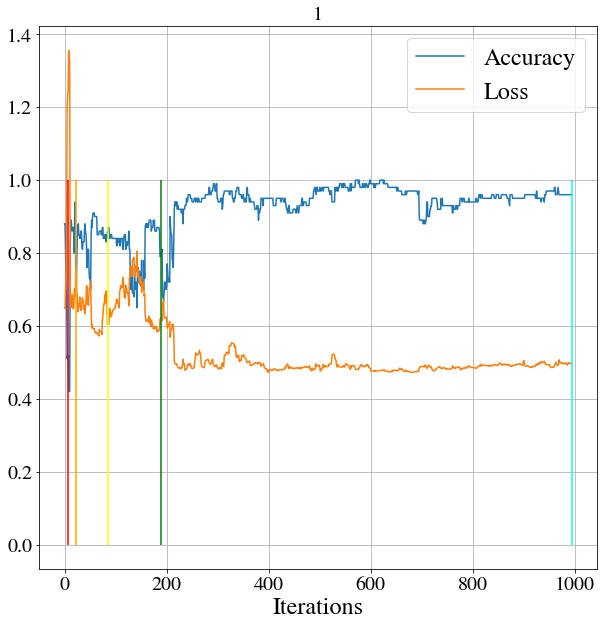

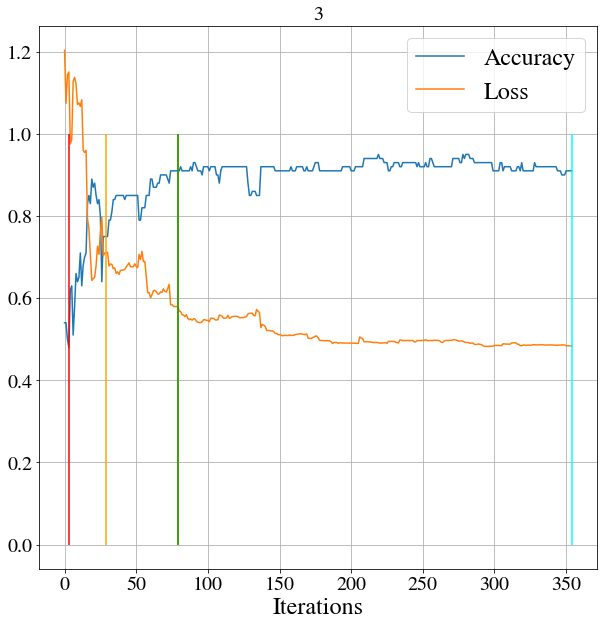

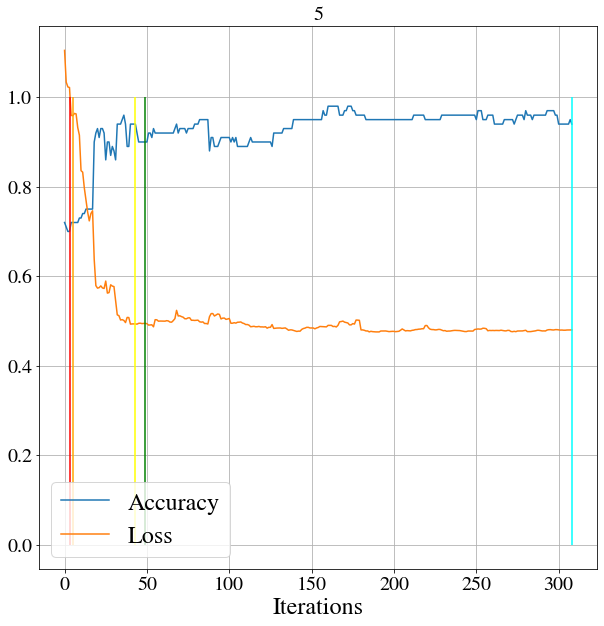

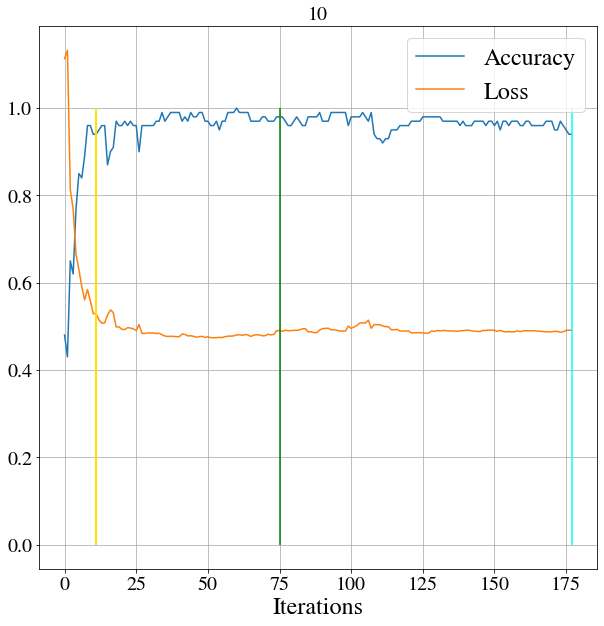

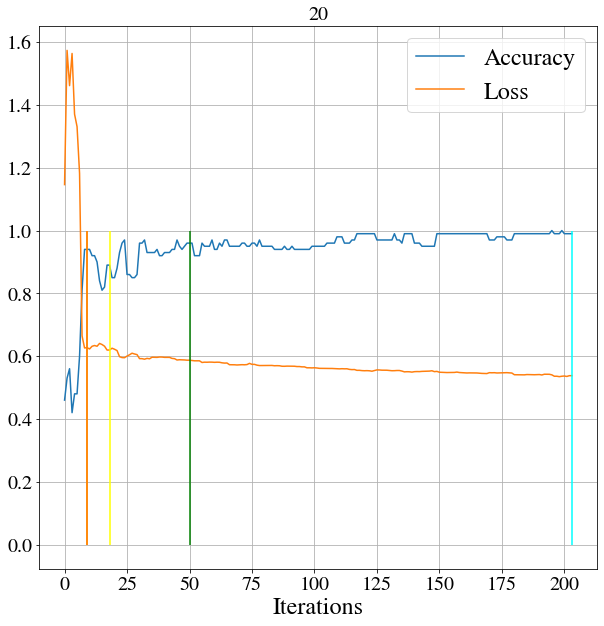

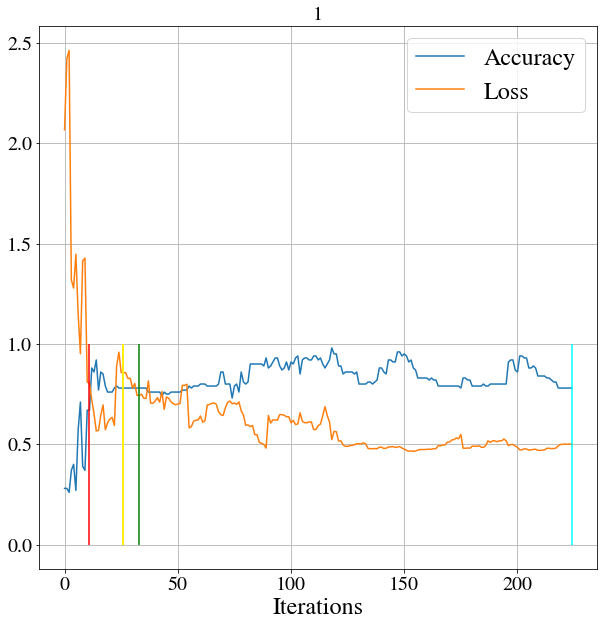

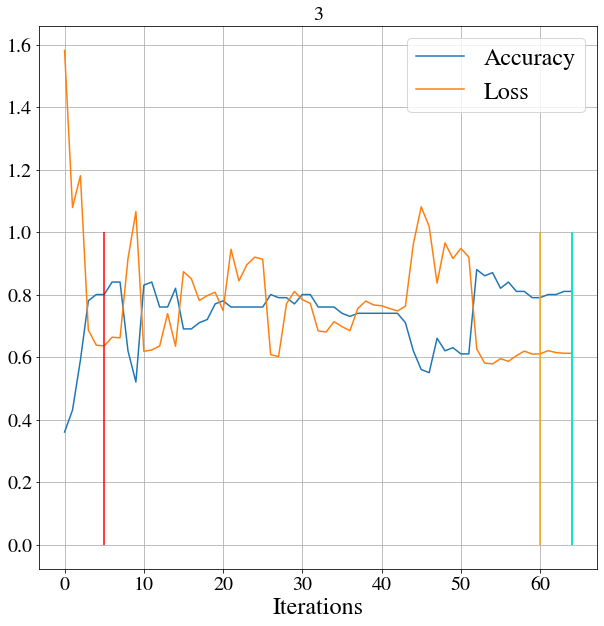

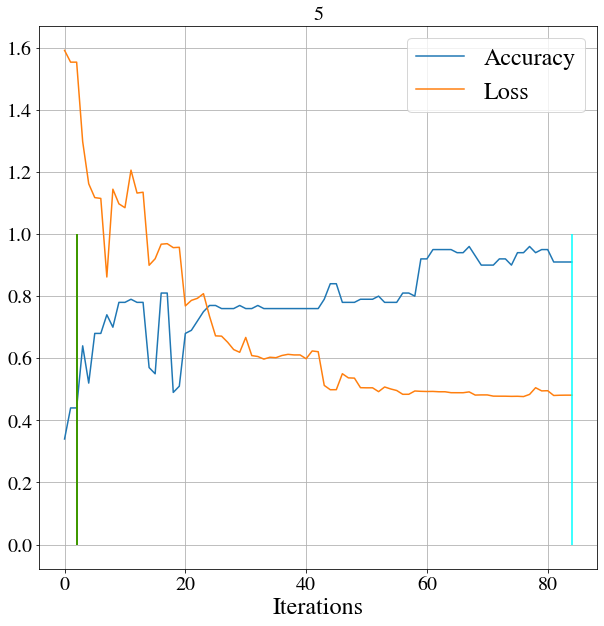

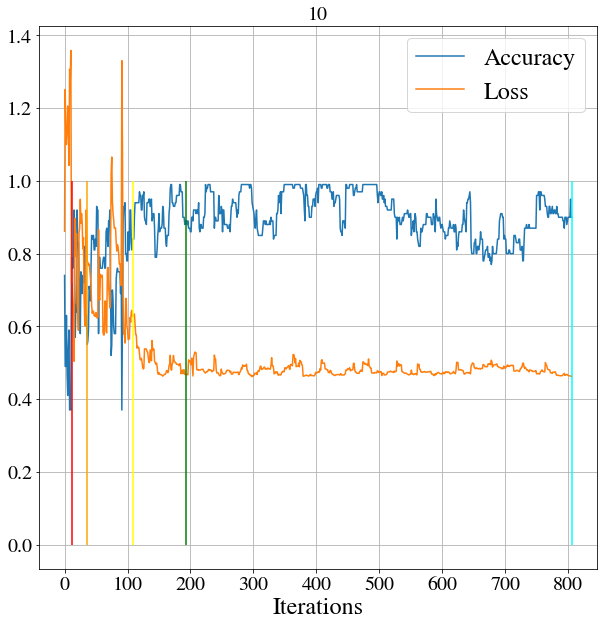

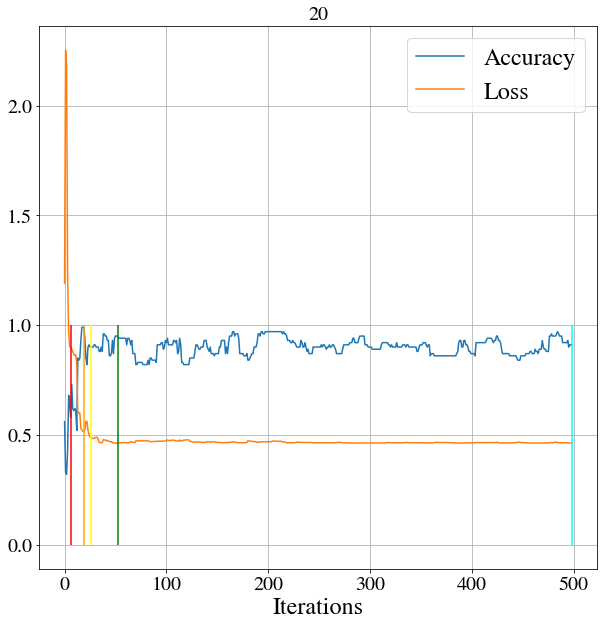

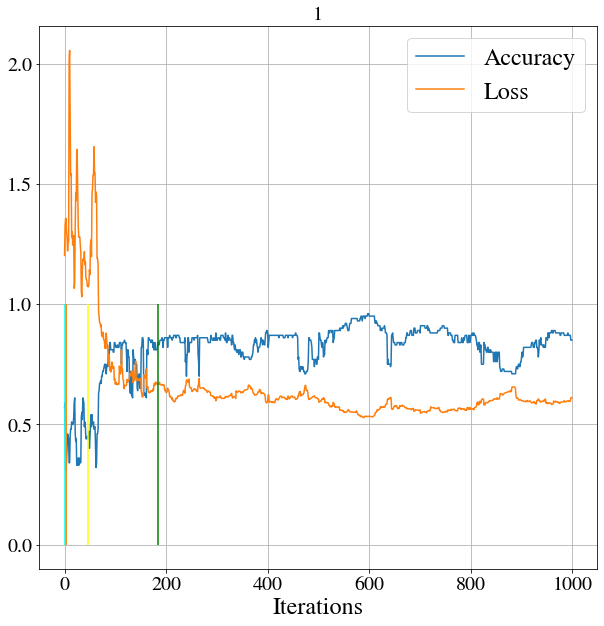

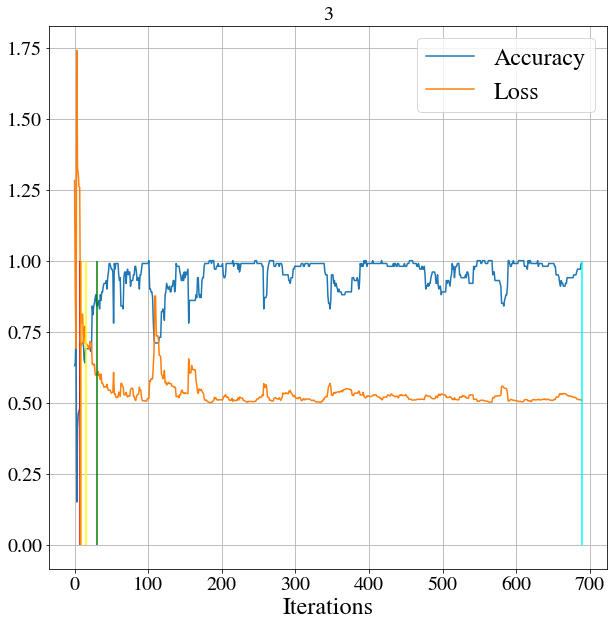

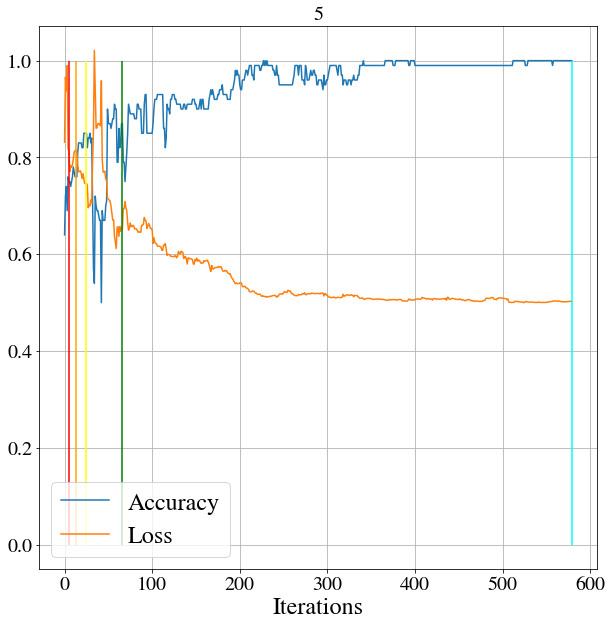

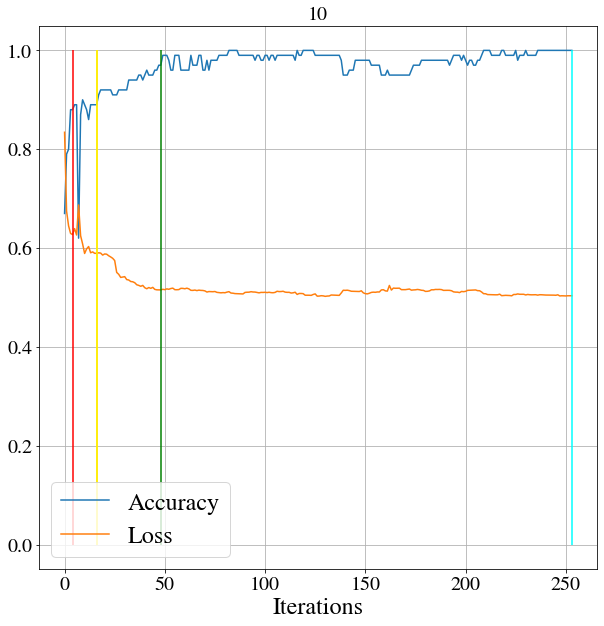

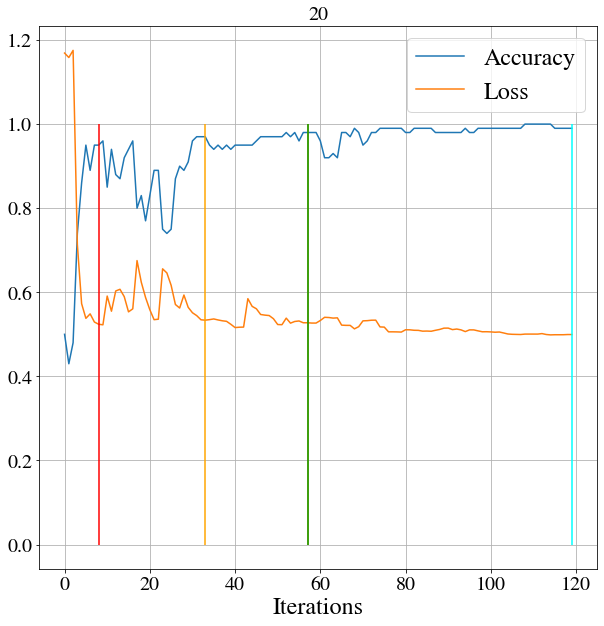

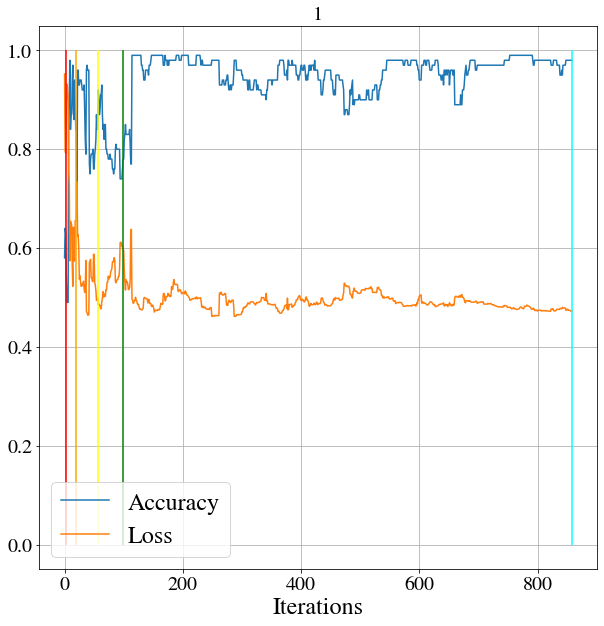

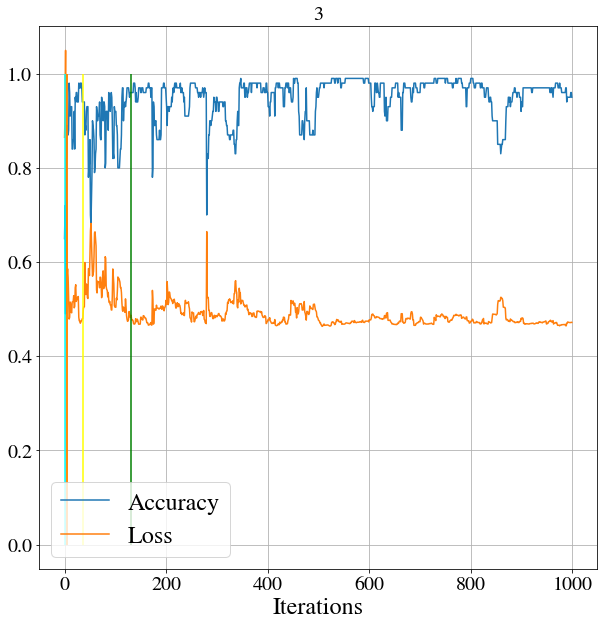

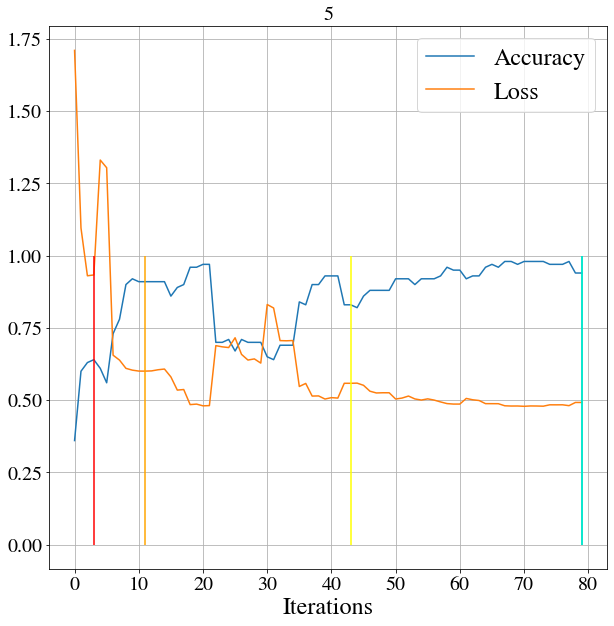

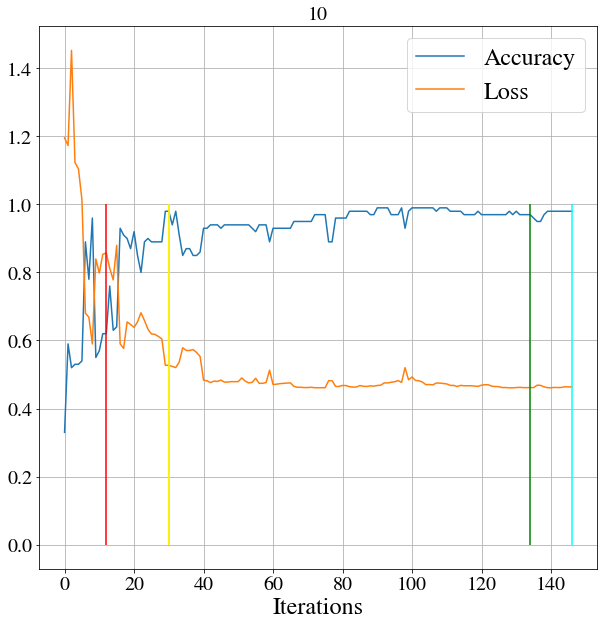

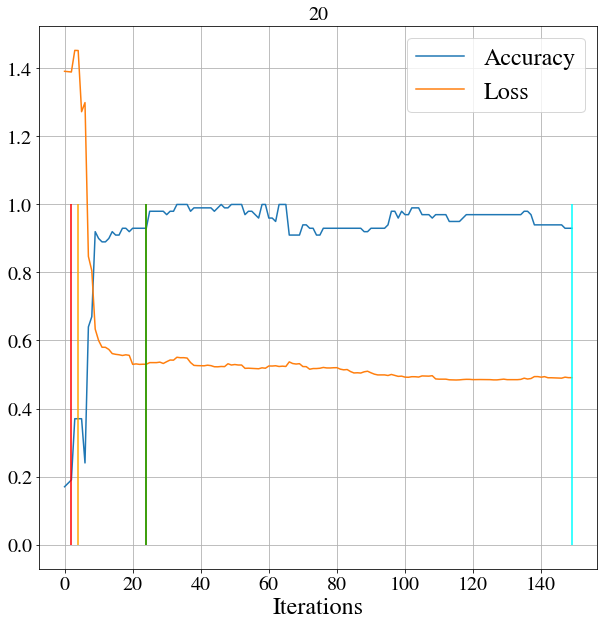

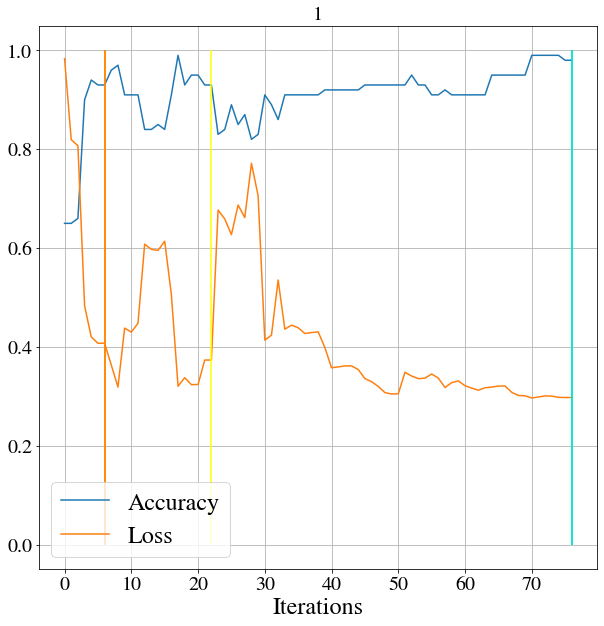

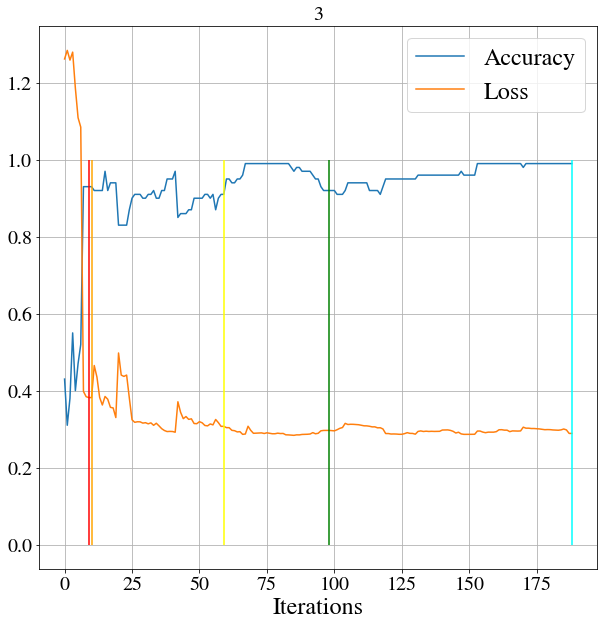

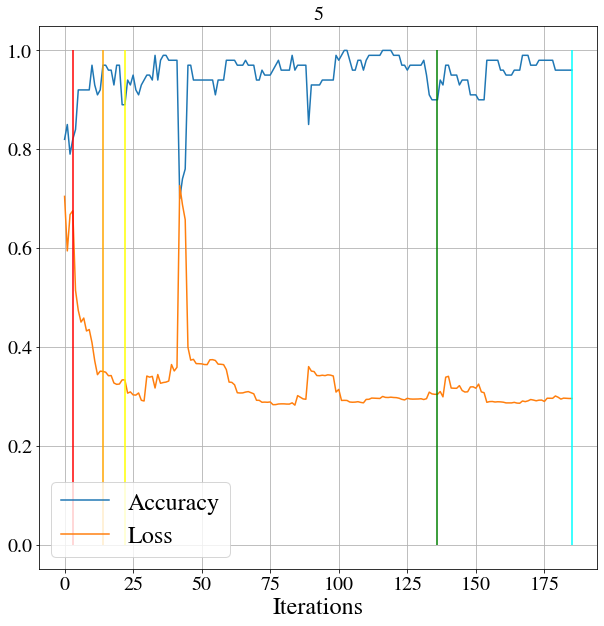

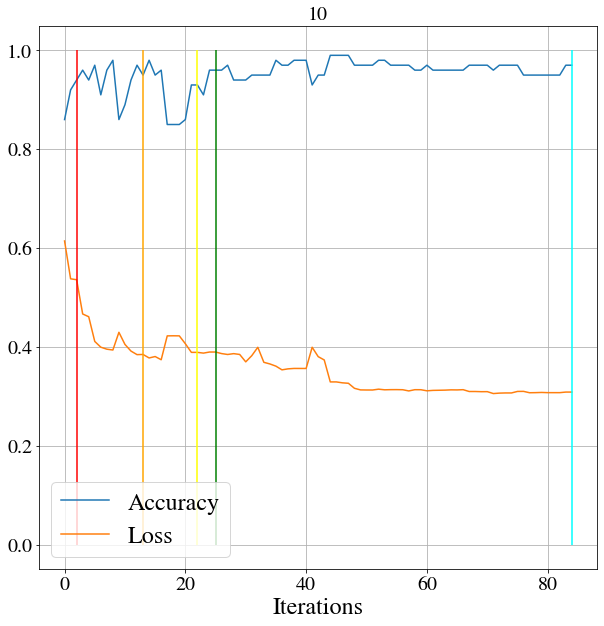

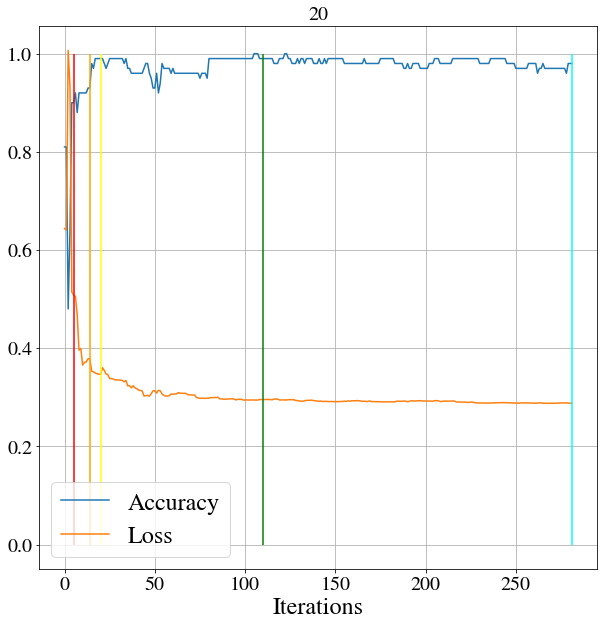

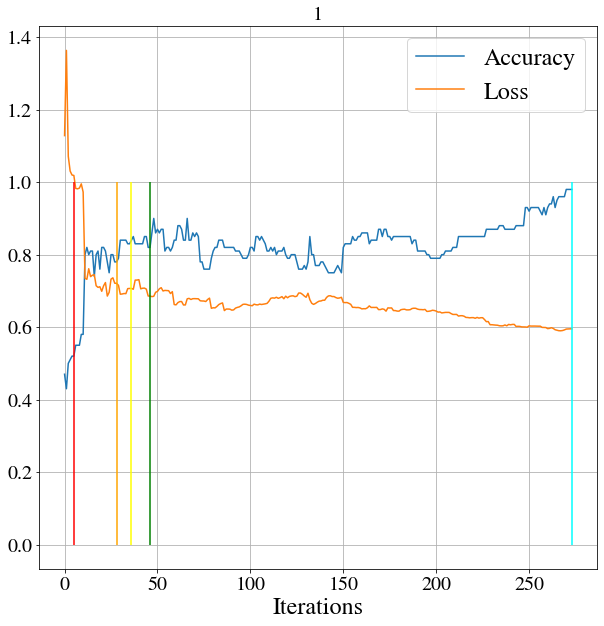

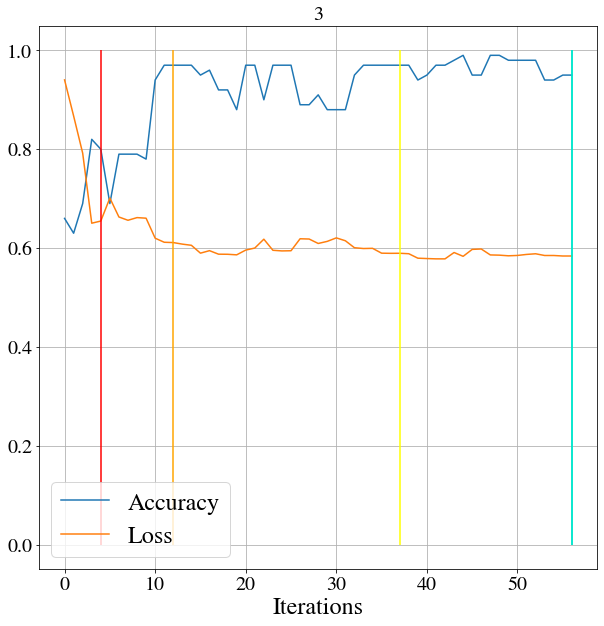

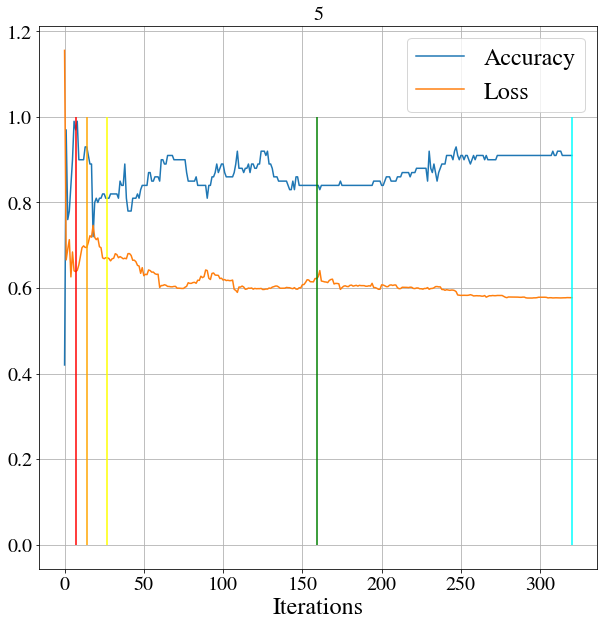

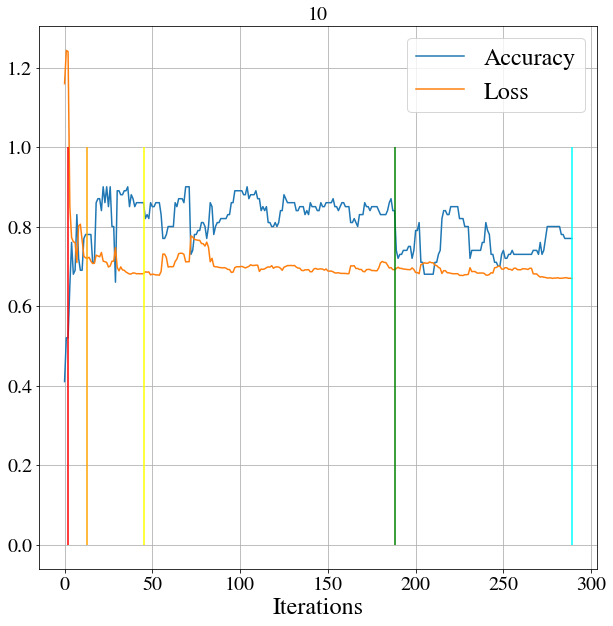

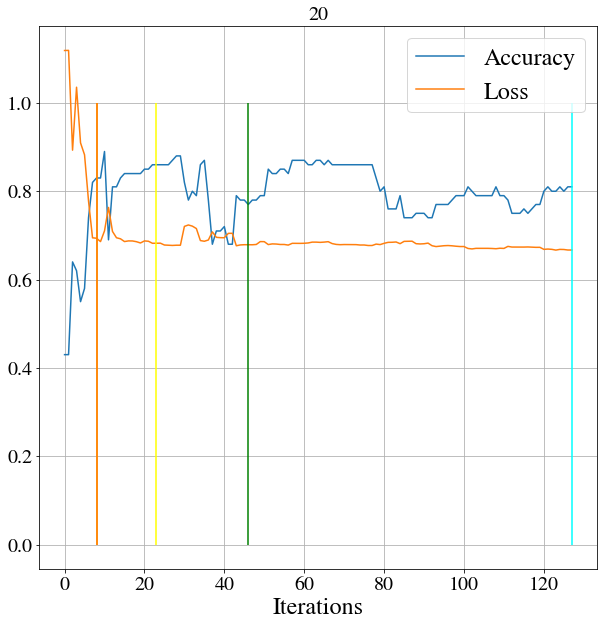

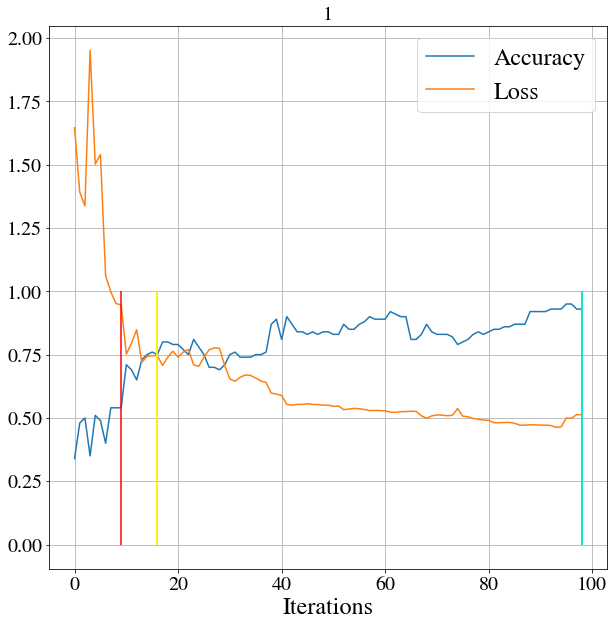

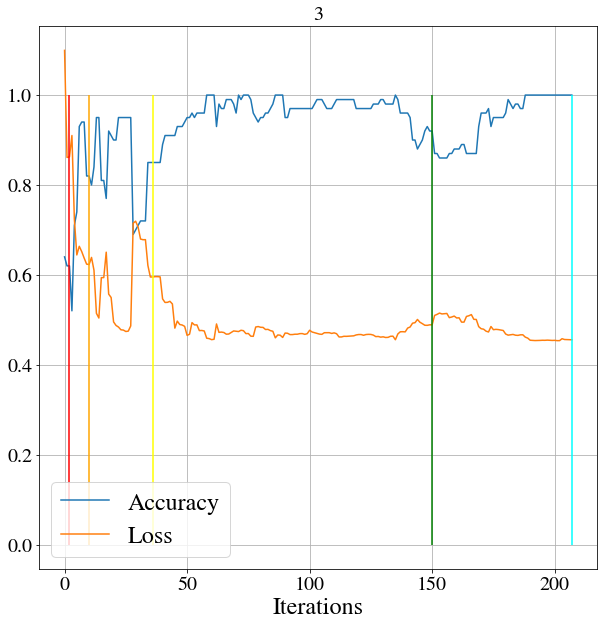

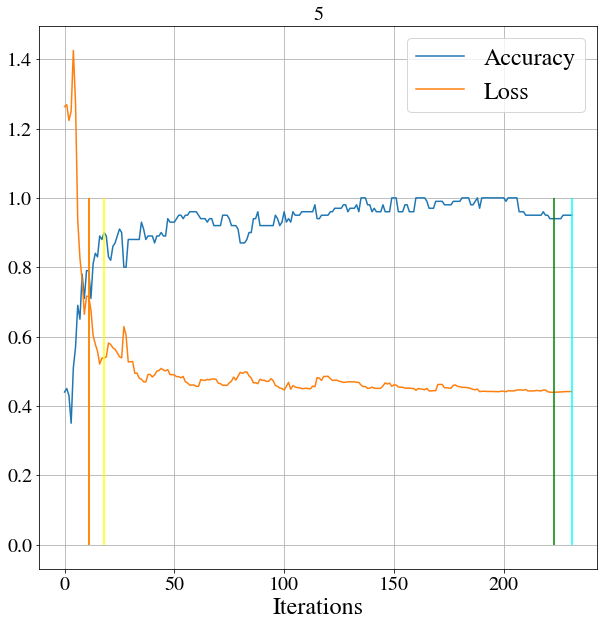

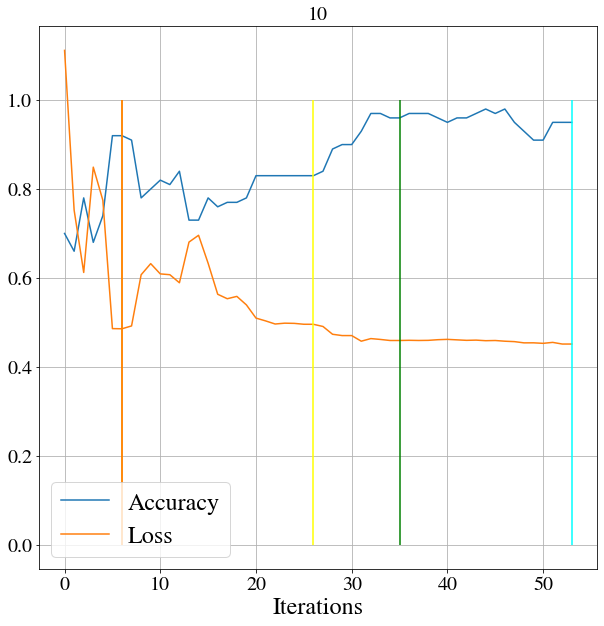

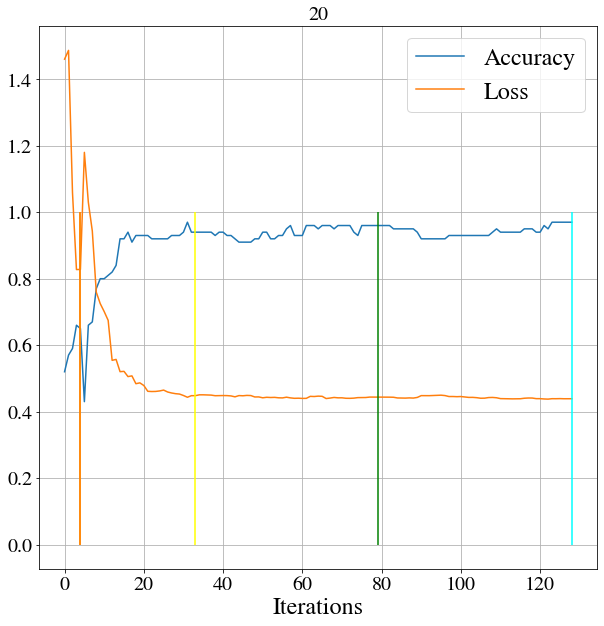

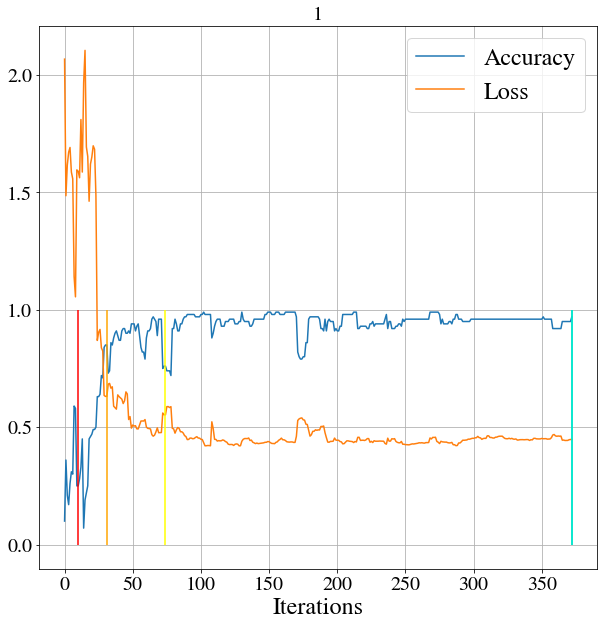

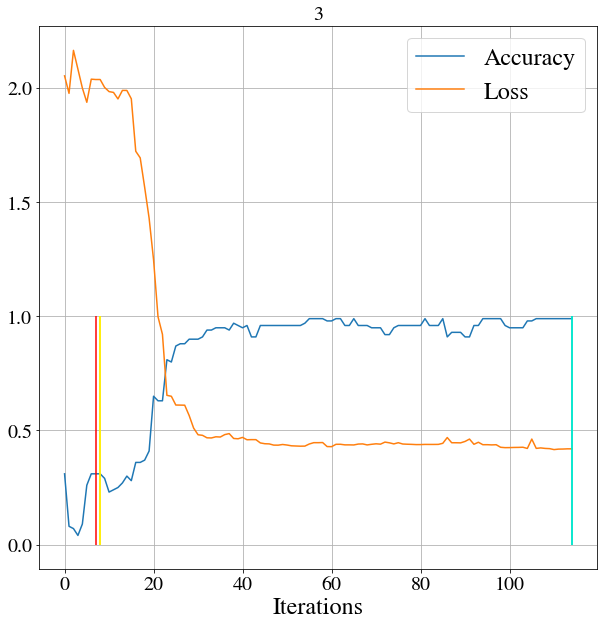

In [45]:

df = pd.read_csv(f'{prefix}hyper_{sep}.csv')
old_seed = 0
old_batch = 0
cols = ['red','orange','yellow','green','cyan']
for i,r in df.iterrows():
    s = int(r['Seed'])
    batch = int(r['Batch'])
    if (s != old_seed) or (batch != old_batch):
        plt.figure(figsize=(10,10))
        plt.title(f'Seed {s}')
        plt.xlabel(r'Iterations')
        plt.grid()

        old_seed = s
        old_batch = batch

        file = f'{prefix}dumps/{sep}_hyper_seed_{s}_batch_{batch}_steps.pkl'
        plot_acc(file)
        plot_loss(file)
        the_data = df[(df['Batch'] == batch) & (df['Seed'] == s)]
   
        plt.vlines(the_data['Convergence'],0,1,colors=cols)
        plt.legend()
        
        plt.title(batch)
    

    

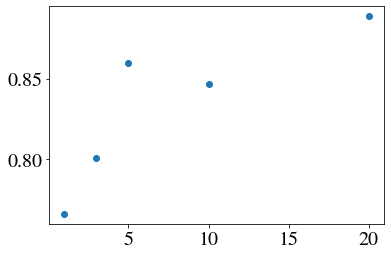

In [48]:
batches = list(set(df['Batch']))
mean_acc = [np.mean(df['Accuracy'][df['Batch'] == b]) for b in batches]
plt.scatter(batches, mean_acc)

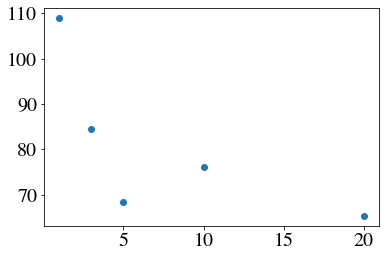

In [49]:
mean_conv = [np.mean(df['Convergence'][df['Batch'] == b]) for b in batches]
plt.scatter(batches, mean_conv)

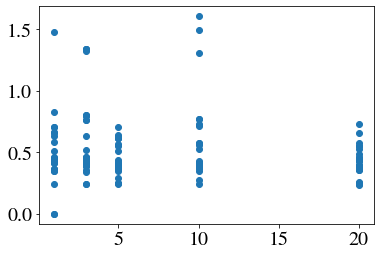

In [34]:
plt.scatter(df['Batch'],df['Loss'])

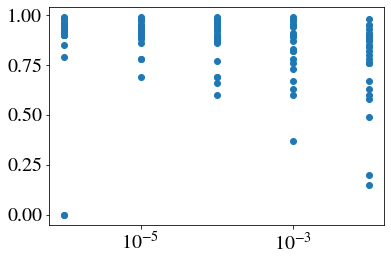

In [44]:
plt.scatter(df['Tol'],df['Accuracy'])
plt.xscale('log')

In [43]:
tols = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
for i, r in df.iterrows():
    r['Tol'] = tols[i % len(tols)]
df

,Seed,Batch,Tol,Convergence,Loss,Accuracy
0,15795.0,1.0,0.010000,13.0,0.364093,0.95
1,15795.0,1.0,0.001000,20.0,0.351419,0.95
2,15795.0,1.0,0.000100,23.0,0.348513,0.95
3,15795.0,1.0,0.000010,341.0,0.423743,0.94
4,15795.0,1.0,0.000001,510.0,0.360508,0.96
...,...,...,...,...,...,...
120,6265.0,20.0,0.010000,6.0,0.374420,0.89
121,6265.0,20.0,0.001000,11.0,0.256092,0.97
122,6265.0,20.0,0.000100,19.0,0.254436,0.97
123,6265.0,20.0,0.000010,30.0,0.246088,0.98
